<a href="https://colab.research.google.com/github/nrussell93/prework-about-me/blob/master/machine_learning_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Best accuracy:  0.8947368421052632
Optimal K:  1


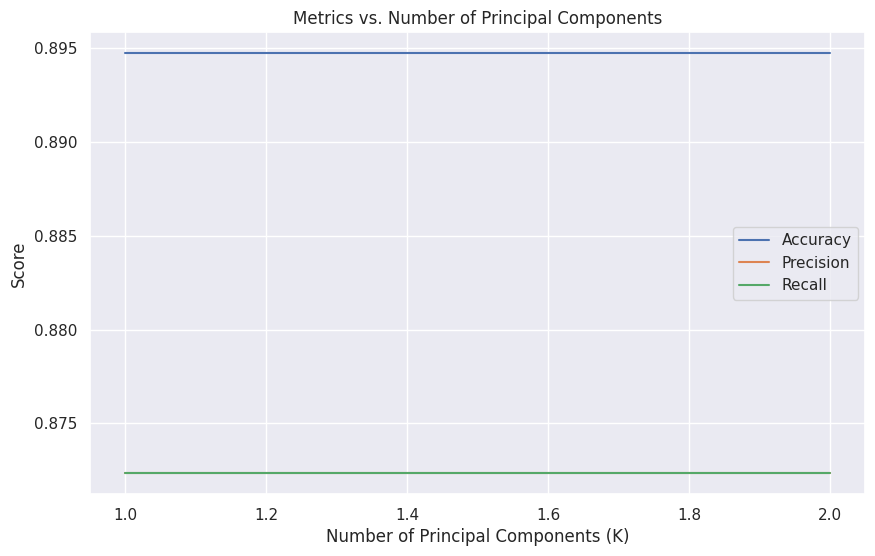

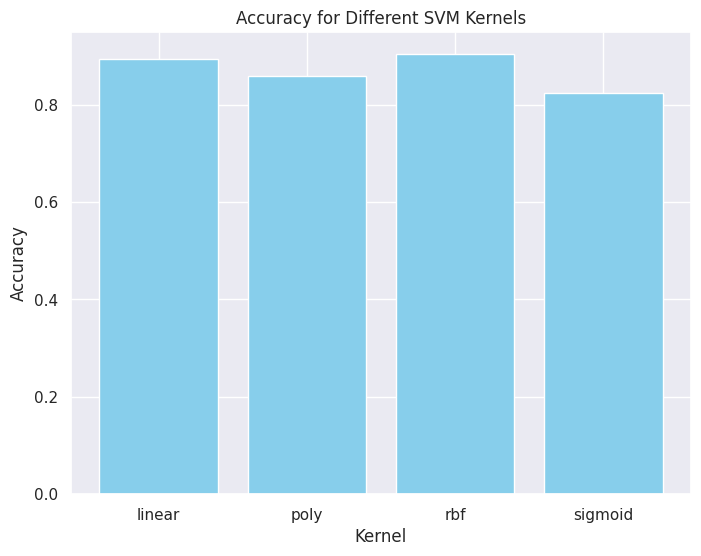

In [ ]:
# HW 4
# Problem 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/My Drive/Colab Notebooks/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))
cancer.head()
cancer.shape
cancer[5:]

X = cancer.iloc[:,[2,31]]
Y = cancer.iloc[:,1]

X = StandardScaler().fit_transform(X)

num_samples, num_features = X.shape
K_range = range(1, min(num_samples, num_features) + 1)

best_accuracy = 0
optimal_k = 0
accuracy_list = []
precision_list = []
recall_list = []

for k in K_range:
  pca = PCA(n_components=k)
  X_pca = pca.fit_transform(X)
  # Split the data into training and test sets
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
  #train SVM classifier
  svm_classifier = SVC(kernel='linear')
  svm_classifier.fit(X_train,Y_train)
  # Prediction on the test set
  Y_pred = svm_classifier.predict(X_test)

  #Calculate the accuracy, precision, recall of the classifier
  accuracy = accuracy_score(Y_test,Y_pred)
  precision = precision_score(Y_test,Y_pred,pos_label='M')
  recall = recall_score(Y_test,Y_pred,pos_label='M')

  #Store accuracy, precision, recall
  accuracy_list.append(accuracy)
  precision_list.append(precision)
  recall_list.append(recall)

for k in K_range:
  pca = PCA(n_components=k)
  X_pca = pca.fit_transform(X)
  # Split the data into training and test sets
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
  #train SVM classifier
  svm_classifier = SVC(kernel='linear')
  svm_classifier.fit(X_train,Y_train)
  # Prediction on the test set
  Y_pred = svm_classifier.predict(X_test)

  #Calculate the accuracy of the classifier
  accuracy = accuracy_score(Y_test,Y_pred)

  if accuracy > best_accuracy:
    best_accuracy = accuracy
    optimal_k = k

print("Best accuracy: ", best_accuracy)
print("Optimal K: ", optimal_k)


plt.figure(figsize=(10, 6))
plt.plot(K_range, accuracy_list, label='Accuracy')
plt.plot(K_range, precision_list, label='Precision')
plt.plot(K_range, recall_list, label='Recall')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Metrics vs. Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()

#1C

accuracies = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    # Initialize and train SVM classifier with different kernels
    svm_classifier = SVC(kernel=kernel)
    svm_classifier.fit(X_train, Y_train)

    # Predict on the test set
    Y_pred = svm_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracies.append(accuracy)

# Plotting the accuracies for different kernels
plt.figure(figsize=(8, 6))
plt.bar(kernels, accuracies, color='skyblue')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different SVM Kernels')
plt.show()



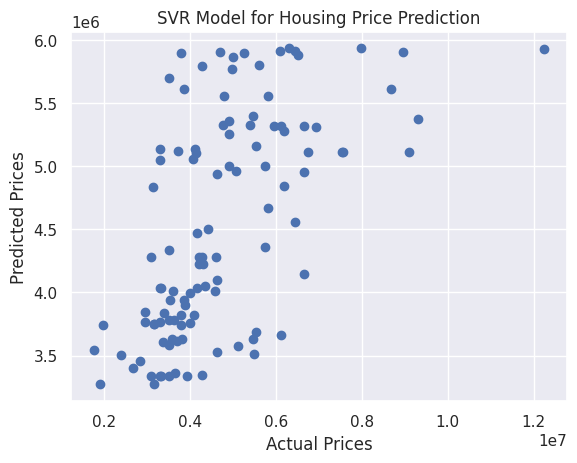

In [ ]:
#HW_4 Problem 2

file_path = '/content/drive/My Drive/Colab Notebooks/Housing.csv'
Housing = pd.DataFrame(pd.read_csv(file_path))

from scipy import stats
import seaborn as sns; sns.set()
#from sklearn.datasets import make_blobs

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Turn Yes and No into 1 and 0
def data_map(x):
    return x.map({'yes': 1, 'no': 0})
Housing[categorical_cols] = Housing[categorical_cols].apply(data_map)
Housing.head()


# Input variables
# Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
X = Housing.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]
Y = Housing.iloc[:,0]

#Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

svr = SVR(kernel='rbf', C=1E5)
svr.fit(X_train,Y_train)

#Predict on the test set
Y_pred = svr.predict(X_test)

# Plotting the regression model
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("SVR Model for Housing Price Prediction")
plt.show()


In [ ]:
#HW 4 Problem 2C

file_path = '/content/drive/My Drive/Colab Notebooks/Housing.csv'
Housing = pd.DataFrame(pd.read_csv(file_path))



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

max_components = len(X_train.columns)  # Maximum number of principal components
components_range = range(1, max_components + 1)

best_accuracy = -1
optimal_components = 0

# Iterate through different numbers of principal components
for k in components_range:
    # Apply PCA with k components
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Create and fit SVR model
    svr = SVR(kernel='rbf')
    svr.fit(X_train_pca, Y_train)

    # Predict on the test set
    Y_pred = svr.predict(X_test_pca)

    # Calculate regression accuracy (you can use any suitable metric)
    accuracy = svr.score(X_test_pca, Y_test)  # R-squared as a metric

    # Check for the best accuracy and its corresponding number of components
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        optimal_components = k

# Print results
print('Optimal K: ',optimal_components)
print('Best accuracy: ', best_accuracy)

Optimal K:  1
Best accuracy:  -0.04114311034775486


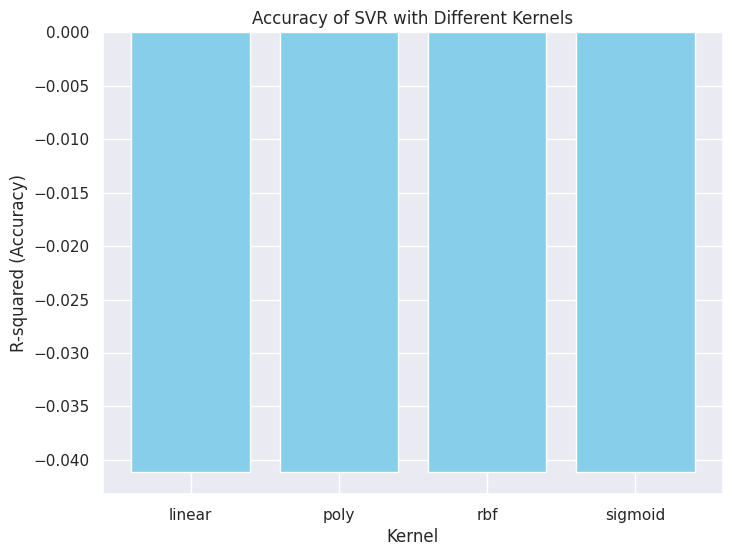

In [ ]:
# HW 4 Problem 2D

file_path = '/content/drive/My Drive/Colab Notebooks/Housing.csv'
Housing = pd.DataFrame(pd.read_csv(file_path))

# Turn Yes and No into 1 and 0
def data_map(x):
    return x.map({'yes': 1, 'no': 0})
Housing[categorical_cols] = Housing[categorical_cols].apply(data_map)
Housing.head()


# Input variables
# Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
X = Housing.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]
Y = Housing.iloc[:,0]

#Scale the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Different kernals to be explored?
kernels = ['linear','poly','rbf','sigmoid']

# Store accuracy values
accuracies = []

for kernel in kernels:

   # Create SVR model for each kernel
  if kernel == 'Linear':
        svr = SVR(kernel='linear')
  elif kernel == 'Polynomial':
        svr = SVR(kernel='poly', degree=3)
  elif kernel == 'RBF':
        svr = SVR(kernel='rbf')
  else:
        svr = SVR(kernel='sigmoid')

  # Fit the SVR model
  svr.fit(X_train_scaled,Y_train)

  # Predict the value of the test set
  Y_pred = svr.predict(X_test_scaled)

  # Calculate the accuracy using R-squared
  accuracy = r2_score(Y_test,Y_pred)
  accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.bar(kernels, accuracies, color='skyblue')
plt.title('Accuracy of SVR with Different Kernels')
plt.xlabel('Kernel')
plt.ylabel('R-squared (Accuracy)')
plt.show()
